# PyCaret implementation

In [52]:
from unidecode import unidecode
import pandas as pd

In [53]:
df = pd.read_csv(r"..\CSVs\EditedDataSet_dfShort-cap.csv", encoding="utf-16")

In [54]:
for col in df:
    df.rename(columns = {col:unidecode(col)}, inplace = True)

In [55]:
data = df.sample(frac=0.8).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (749, 7)
Unseen Data For Predictions: (187, 7)


In [56]:
from pycaret.regression import *

exp_reg101 = setup(data = data, target = 'Pret') 

,Description,Value
0,Session id,4768
1,Target,Pret
2,Target type,Regression
3,Original data shape,"(749, 7)"
4,Transformed data shape,"(749, 7)"
5,Transformed train set shape,"(524, 7)"
6,Transformed test set shape,"(225, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [57]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,112616.2813,38652599087.8603,194278.5815,0.6942,0.3908,0.3022,0.0300
rf,Random Forest Regressor,121507.1131,38987466202.8742,195378.1591,0.6912,0.3952,0.3215,0.0360
gbr,Gradient Boosting Regressor,140706.9484,43755620732.0528,206716.0488,0.6575,0.4354,0.3901,0.0130
lightgbm,Light Gradient Boosting Machine,137791.1372,47001495440.2605,214293.9405,0.6297,0.4309,0.3578,0.0500
en,Elastic Net,161065.8766,52441840025.6000,226384.3703,0.5915,0.4831,0.4543,0.0050
ridge,Ridge Regression,161366.2031,52483337216.0000,226394.5406,0.5912,0.4891,0.4554,0.0050
lar,Least Angle Regression,161369.7062,52487479296.0000,226400.6906,0.5912,0.4892,0.4555,0.0050
llar,Lasso Least Angle Regression,161369.6625,52487419084.8000,226400.5953,0.5912,0.4892,0.4554,0.0060
lasso,Lasso Regression,161369.6812,52487419289.6000,226400.5969,0.5912,0.4892,0.4554,0.0060
lr,Linear Regression,161369.7141,52487477862.4000,226400.6922,0.5912,0.4892,0.4555,0.0060


ExtraTreesRegressor(n_jobs=-1, random_state=4768)

In [58]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,112746.3334,37453036018.2593,193527.8688,0.7128,0.4097,0.3129
1,101450.7919,32739174675.4713,180939.6990,0.7752,0.3262,0.2393
2,134157.1715,38492159344.8080,196194.1878,0.6003,0.4197,0.3895
3,116652.7808,29965283717.0444,173104.8345,0.8063,0.4738,0.3762
4,116627.8145,30476137343.7141,174574.1600,0.6500,0.3721,0.3343
5,141038.6528,56252733090.9313,237176.5863,0.5889,0.4549,0.4134
6,116687.0549,36476269364.8442,190987.6157,0.7175,0.3263,0.2478
7,130566.6222,58386169864.6350,241632.3030,0.7046,0.3712,0.2454
8,108114.9476,21170405643.8238,145500.5349,0.8000,0.4137,0.3464


In [67]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,91824.2983,31335402778.2983,177018.0860,0.7597,0.3607,0.2556
1,85322.7509,28881035732.9668,169944.2136,0.8017,0.3224,0.2244
2,127923.4151,35675568647.6153,188879.7730,0.6296,0.3886,0.3656
3,110952.0509,34223376692.0312,184995.6126,0.7787,0.4597,0.3614
4,104260.2271,28259950561.2199,168106.9617,0.6754,0.3784,0.3024
5,129152.0188,52080722970.4718,228212.0132,0.6194,0.4276,0.3720
6,116418.9431,35420945628.7567,188204.5314,0.7257,0.3313,0.2434
7,116607.3738,60227150762.4792,245412.2058,0.6953,0.3722,0.2160
8,99124.5956,23613996380.7113,153668.4625,0.7769,0.4215,0.3317


Tuning the model

In [59]:
tuned_rf = tune_model(rf)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,111578.2349,38005033246.0154,194948.7965,0.7086,0.4065,0.3082
1,109412.8529,33078535826.6434,181875.0555,0.7729,0.3358,0.2632
2,142640.9292,41021137632.3197,202536.7563,0.5740,0.4154,0.3951
3,120078.1945,29970071714.8310,173118.6637,0.8062,0.4572,0.3761
4,120970.8949,28510985457.5286,168851.9631,0.6725,0.3850,0.3386
5,151575.2944,58778610922.2062,242443.0055,0.5705,0.4737,0.4446
6,125467.3549,42538866805.8449,206249.5256,0.6706,0.3352,0.2581
7,152489.7178,72145619467.3389,268599.3661,0.6350,0.4029,0.2806
8,109593.2872,21877249301.2891,147909.5984,0.7933,0.4086,0.3493


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Plot model

In [68]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,113859.1657,35764228498.8374,189114.3265,0.7258,0.3953,0.3200
1,126147.9211,40869083100.3048,202161.0326,0.7194,0.3527,0.3016
2,141670.2621,42311103290.3900,205696.6293,0.5607,0.4086,0.3927
3,125874.7419,35279881578.8028,187829.3949,0.7719,0.4629,0.3941
4,116626.4677,25560175641.6580,159875.5004,0.7064,0.3639,0.3209
5,142216.8920,46956889108.6468,216695.3832,0.6569,0.4505,0.4365
6,115033.0440,32906755272.8578,181402.1920,0.7452,0.3070,0.2425
7,156681.6170,73190118877.8146,270536.7237,0.6297,0.4049,0.2865
8,121071.1088,29286893245.1475,171134.1382,0.7234,0.4317,0.3792


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


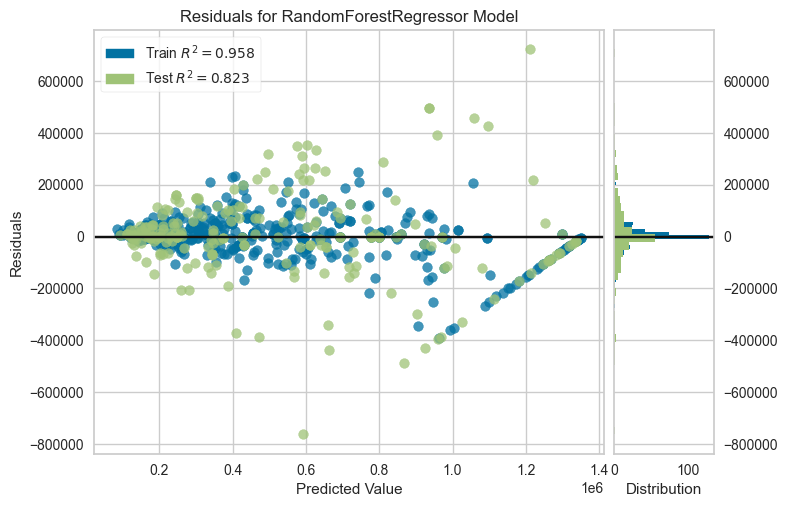

In [60]:
plot_model(tuned_rf)

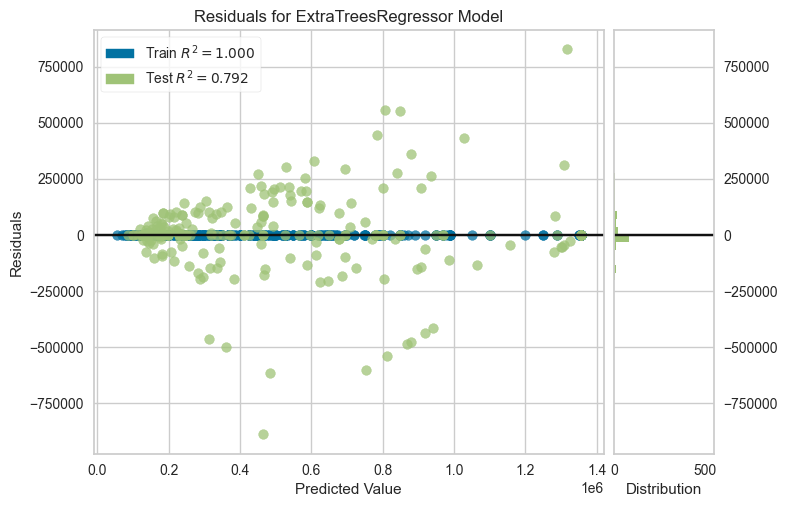

In [69]:
plot_model(tuned_et)

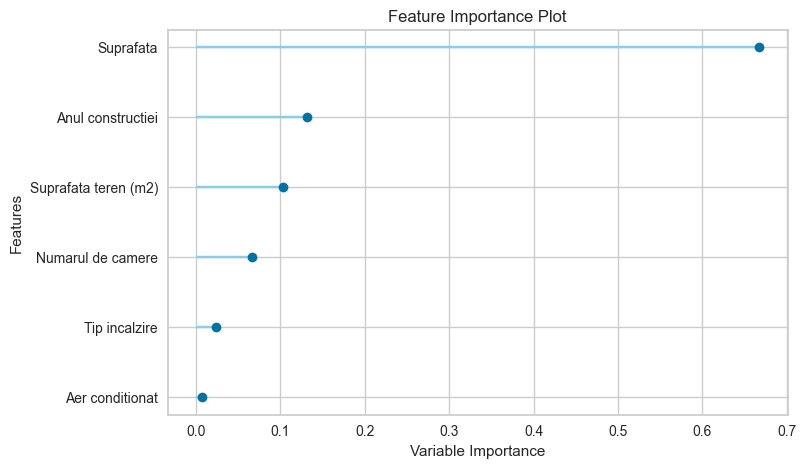

In [61]:
plot_model(tuned_rf, plot='feature')

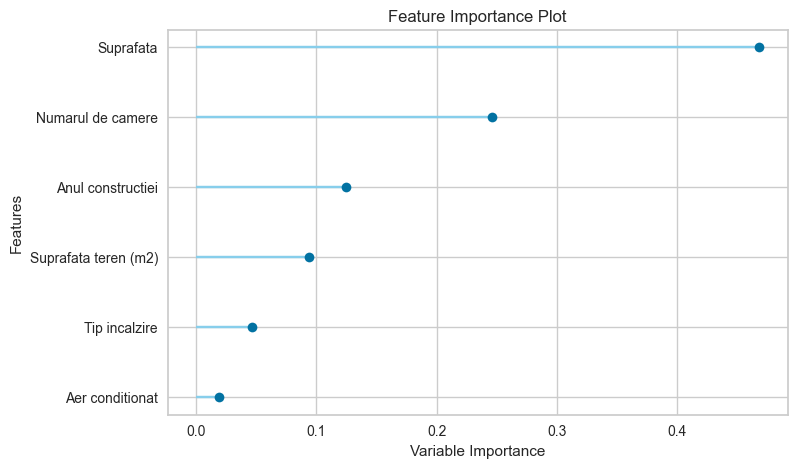

In [71]:
plot_model(tuned_et, plot="feature")

Prediction

In [62]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,102320.5507,27180250858.0601,164864.3408,0.8232,0.3393,0.2762


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
562,370.000000,7.0,180.00,2005.0,5.0,0,780000.0,4.090948e+05
340,180.000000,6.0,240.00,2018.0,4.0,1,129800.0,1.303520e+05
273,180.000000,6.0,240.00,2018.0,4.0,1,129800.0,1.303520e+05
101,420.000000,7.0,390.00,2022.0,7.0,0,779000.0,7.886790e+05
420,53.000000,7.0,163.00,2008.0,2.0,0,265000.0,2.019350e+05
...,...,...,...,...,...,...,...,...
592,658.700012,7.0,713.25,1997.0,10.0,0,1355000.0,1.213200e+06
709,550.000000,7.0,270.00,1913.0,10.0,0,1100000.0,9.852700e+05
64,226.000000,7.0,135.00,2023.0,5.0,0,485000.0,2.796198e+05
486,145.000000,6.0,278.00,2009.0,5.0,1,230000.0,2.437957e+05


In [ ]:
predict_model(tuned_et)

In [63]:
final_rf = finalize_model(tuned_rf)

In [ ]:
final_et - finalize_model(tuned_et)

In [64]:
predict_model(final_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,35993.7079,3715935841.1691,60958.4764,0.9758,0.1376,0.0938


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
562,370.000000,7.0,180.00,2005.0,5.0,0,780000.0,6.320490e+05
340,180.000000,6.0,240.00,2018.0,4.0,1,129800.0,1.298000e+05
273,180.000000,6.0,240.00,2018.0,4.0,1,129800.0,1.298000e+05
101,420.000000,7.0,390.00,2022.0,7.0,0,779000.0,7.587250e+05
420,53.000000,7.0,163.00,2008.0,2.0,0,265000.0,2.570606e+05
...,...,...,...,...,...,...,...,...
592,658.700012,7.0,713.25,1997.0,10.0,0,1355000.0,1.293300e+06
709,550.000000,7.0,270.00,1913.0,10.0,0,1100000.0,1.065860e+06
64,226.000000,7.0,135.00,2023.0,5.0,0,485000.0,4.267540e+05
486,145.000000,6.0,278.00,2009.0,5.0,1,230000.0,2.306950e+05


In [66]:
unseen_predictions = predict_model(final_rf, data = data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,58013.5143,10621318005.5144,103059.7788,0.8959,0.2559,0.1776


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
0,170.0,6.0,170.0,2023.0,4.0,0,137000.0,150521.80
1,501.0,6.0,444.0,2021.0,10.0,1,970000.0,970000.00
2,150.0,7.0,298.0,1960.0,6.0,0,365000.0,361647.98
3,100.0,12.0,71.0,2021.0,3.0,0,129000.0,129000.00
4,290.0,7.0,250.0,2009.0,8.0,0,249900.0,669040.99
